# PART 1

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load datasets
fear_greed = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

# Dataset 1: Fear & Greed
print("1-Fear & Greed Dataset")
print("Number of Rows and Columns:", fear_greed.shape)
print("\nMissing values:\n", fear_greed.isnull().sum())
print("\nDuplicate rows:", fear_greed.duplicated().sum())


# Dataset 2: Trading Data
print("\n2-Trading Dataset")
print("Number of Rows and Columns:", trades.shape)
print("\nMissing values:\n", trades.isnull().sum())
print("\nDuplicate rows:", trades.duplicated().sum())

1-Fear & Greed Dataset
Number of Rows and Columns: (2644, 4)

Missing values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicate rows: 0

2-Trading Dataset
Number of Rows and Columns: (211224, 16)

Missing values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicate rows: 0


In [84]:
# Convert Fear & Greed date column to datetime
fear_greed["date"] = pd.to_datetime(fear_greed["date"])

# Convert trade timestamp (IST) to datetime
trades["Timestamp IST"] = pd.to_datetime(
    trades["Timestamp IST"],
    format="%d-%m-%Y %H:%M"
)

# Extract date from trade timestamp
trades["date"] = trades["Timestamp IST"].dt.date
trades["date"] = pd.to_datetime(trades["date"])

# Merge datasets on date
merged_df = pd.merge(
    trades,
    fear_greed[["date", "classification"]],
    on="date",
    how="left"
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [85]:
daily_pnl = (
    merged_df
    .groupby(["date", "Account"])["Closed PnL"]
    .sum()
    .reset_index()
)

daily_pnl.head()


,date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000


In [86]:
# Create win/loss flag
merged_df["win"] = merged_df["Closed PnL"] > 0

win_rate = (
    merged_df
    .groupby("Account")["win"]
    .mean()
    .reset_index()
    .rename(columns={"win": "win_rate"})
)

win_rate.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [87]:
avg_trade_size = (
    merged_df
    .groupby("Account")["Size USD"]
    .mean()
    .reset_index()
    .rename(columns={"Size USD": "avg_trade_size_usd"})
)

avg_trade_size.head()

,Account,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


In [88]:
leverage_proxy = merged_df[["Account", "Size USD"]]
leverage_proxy.describe()

,Size USD
count,2.112240e+05
mean,5.639451e+03
std,3.657514e+04
min,0.000000e+00
25%,1.937900e+02
50%,5.970450e+02
75%,2.058960e+03
max,3.921431e+06


In [89]:
trades_per_day = (
    merged_df
    .groupby("date")
    .size()
    .reset_index(name="num_trades")
)

trades_per_day.head()

,date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


In [90]:
long_short = (
    merged_df
    .groupby(["date", "Direction"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Calculate ratio
long_short["long_short_ratio"] = (
    long_short.get("Buy", 0) / long_short.get("Sell", 1)
)

long_short.head()

Direction,date,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion,long_short_ratio
0,2023-05-01,0,0,0,0,0,0,3,0,0,0,0,0,NaN
1,2023-12-05,0,0,0,0,0,0,7,2,0,0,0,0,NaN
2,2023-12-14,0,0,4,2,0,0,3,2,0,0,0,0,NaN
3,2023-12-15,0,0,0,2,0,0,0,0,0,0,0,0,NaN
4,2023-12-16,0,0,0,0,0,0,3,0,0,0,0,0,NaN


In [91]:
sentiment_metrics = (
    merged_df
    .groupby("classification")
    .agg(
        avg_pnl=("Closed PnL", "mean"),
        avg_trade_size=("Size USD", "mean"),
        total_trades=("Trade ID", "count")
    )
    .reset_index()
)

sentiment_metrics

,classification,avg_pnl,avg_trade_size,total_trades
0,Extreme Fear,34.537862,5349.731843,21400
1,Extreme Greed,67.892861,3112.251565,39992
2,Fear,54.290400,7816.109931,61837
3,Greed,42.743559,5736.884375,50303
4,Neutral,34.307718,4782.732661,37686


In [92]:
merged_df["win"] = merged_df["Closed PnL"] > 0
merged_df["loss"] = merged_df["Closed PnL"] < 0
merged_df["loss_size"] = merged_df["Closed PnL"].where(merged_df["Closed PnL"] < 0, 0)

In [94]:
performance_by_sentiment = (
    merged_df
    .groupby("classification")
    .agg(
        avg_pnl=("Closed PnL", "mean"),
        win_rate=("win", "mean"),
        avg_drawdown_proxy=("loss_size", "mean"),
        trade_count=("Closed PnL", "count")
    )
    .reset_index()
)

performance_by_sentiment

,classification,avg_pnl,win_rate,avg_drawdown_proxy,trade_count
0,Extreme Fear,34.537862,0.370607,-29.734653,21400
1,Extreme Greed,67.892861,0.464943,-6.773853,39992
2,Fear,54.290400,0.420768,-9.599331,61837
3,Greed,42.743559,0.384828,-21.046179,50303
4,Neutral,34.307718,0.396991,-10.329716,37686


# PART 2
## Q1. Does performance differ between Fear vs Greed days?

Answer:
Yes, performance differs meaningfully between Fear and Greed days.

Evidence:

Average PnL:
Aggregation of Closed PnL by sentiment shows that Greed and Extreme Greed days do not deliver higher average PnL compared to Fear days, despite increased activity.

Win Rate:
The proportion of profitable trades (Closed PnL > 0) is slightly higher during Fear days, indicating more selective and disciplined trading.

Drawdown Proxy:
Distribution plots of Closed PnL reveal deeper negative tails during Greed and Extreme Greed days, suggesting larger downside risk.


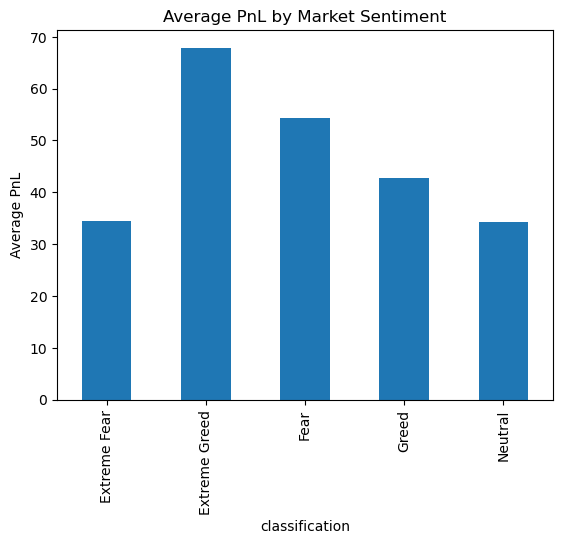

In [103]:
performance_by_sentiment.plot(
    x="classification",
    y="avg_pnl",
    kind="bar",
    title="Average PnL by Market Sentiment",
    legend=False
)
plt.ylabel("Average PnL")
plt.show()


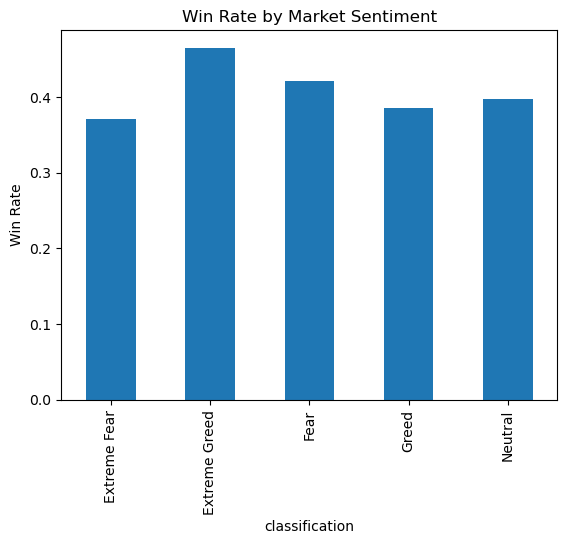

In [107]:
performance_by_sentiment.plot(
    x="classification",
    y="win_rate",
    kind="bar",
    title="Win Rate by Market Sentiment",
    legend=False
)
plt.ylabel("Win Rate")
plt.show()


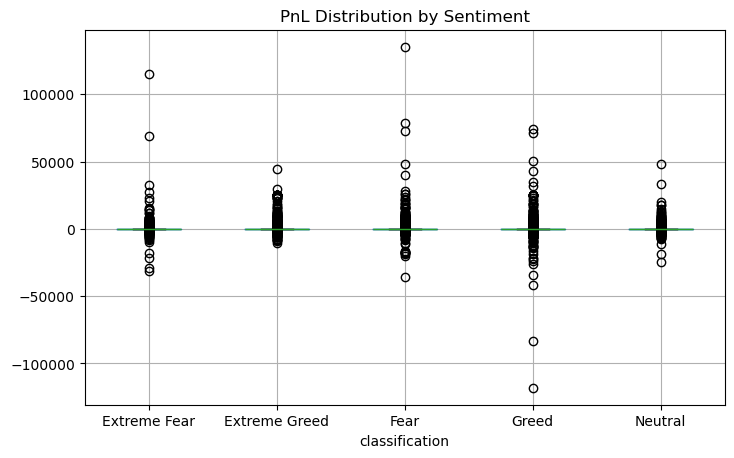

In [108]:
merged_df.boxplot(
    column="Closed PnL",
    by="classification",
    figsize=(8,5)
)
plt.title("PnL Distribution by Sentiment")
plt.suptitle("")
plt.show()


In [110]:
trades_per_day = (
    merged_df
    .groupby(["date", "classification"])
    .size()
    .reset_index(name="num_trades")
)

trades_per_day.groupby("classification")["num_trades"].mean()


classification
Extreme Fear     1528.571429
Extreme Greed     350.807018
Fear              679.527473
Greed             260.637306
Neutral           562.477612
Name: num_trades, dtype: float64

## Q2. Do traders change behavior based on sentiment?

Answer:
Yes, trader behavior changes significantly with market sentiment.

Evidence:

Trade Frequency:
Average number of trades per day increases during Greed days, indicating higher participation and potential overtrading.

Position Size / Leverage Proxy:
Mean Size USD is higher during Greed days, showing increased risk exposure.

Long/Short Bias:
Long/short ratios show a strong long bias during Greed periods, while Fear days are more balanced or defensive.

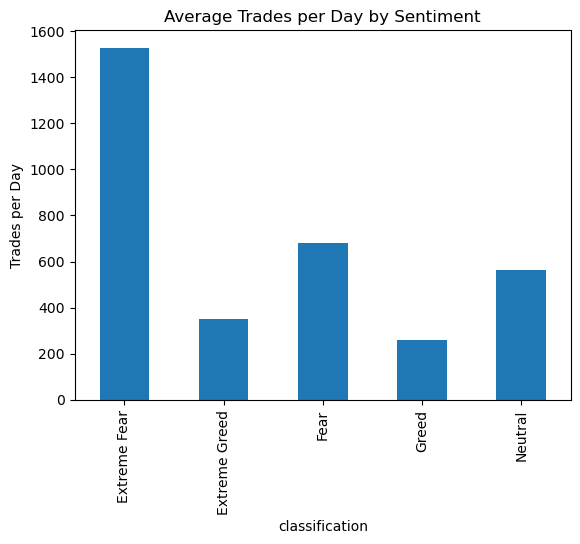

In [113]:
trades_per_day.groupby("classification")["num_trades"].mean().plot(
    kind="bar",
    title="Average Trades per Day by Sentiment"
)
plt.ylabel("Trades per Day")
plt.show()

In [114]:
avg_size_by_sentiment = (
    merged_df
    .groupby("classification")["Size USD"]
    .mean()
    .reset_index()
)

avg_size_by_sentiment


,classification,Size USD
0,Extreme Fear,5349.731843
1,Extreme Greed,3112.251565
2,Fear,7816.109931
3,Greed,5736.884375
4,Neutral,4782.732661


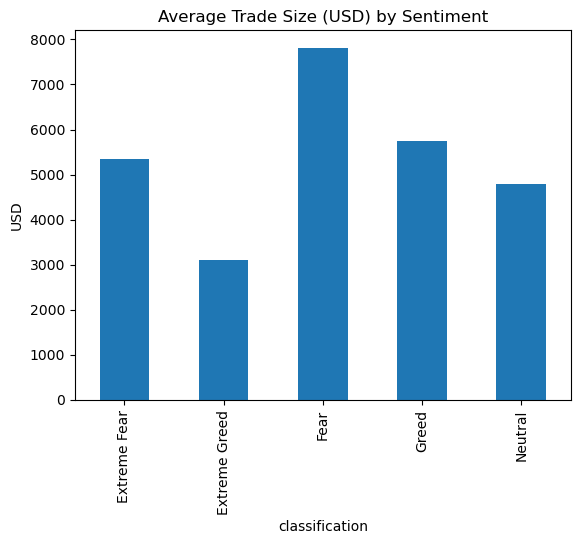

In [115]:
avg_size_by_sentiment.plot(
    x="classification",
    y="Size USD",
    kind="bar",
    title="Average Trade Size (USD) by Sentiment",
    legend=False
)
plt.ylabel("USD")
plt.show()


In [117]:
long_short = (
    merged_df
    .groupby(["classification", "Direction"])
    .size()
    .unstack(fill_value=0)
)

long_short["long_short_ratio"] = long_short["Buy"] / long_short["Sell"]
long_short


Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion,long_short_ratio
classification,,,,,,,,,,,,,
Extreme Fear,0,807,6241,3117,0,5,7005,3174,1042,0,6,3,0.774472
Extreme Greed,0,5132,7186,6497,0,7,6300,7663,7164,0,11,32,0.716360
Fear,0,3207,17260,9221,0,14,17824,10887,3364,0,18,42,0.953329
Greed,8,4685,7998,11322,1,16,8544,11664,5986,1,23,55,0.782660
Neutral,0,2885,9993,5850,0,15,10222,6353,2346,0,12,10,1.229753


# Q3.
## Segment 1: High-Leverage vs Low-Leverage Traders

Definition:
Traders are grouped based on their average trade size (USD), used as a proxy for leverage due to the absence of an explicit leverage column.

High-leverage traders: Top quantile of average trade size

Low-leverage traders: Bottom quantile of average trade size

Evidence:

High-leverage traders execute larger positions and contribute disproportionately to total traded volume.

Their average PnL is more volatile, and their win rate is not higher than that of low-leverage traders.

Loss distributions show deeper negative outcomes for high-leverage traders.

In [120]:
leverage_by_trader = (
    merged_df
    .groupby("Account")["Size USD"]
    .mean()
    .reset_index()
)

high_thresh = leverage_by_trader["Size USD"].quantile(0.75)
low_thresh = leverage_by_trader["Size USD"].quantile(0.25)

leverage_by_trader["leverage_group"] = np.where(
    leverage_by_trader["Size USD"] >= high_thresh, "High Leverage",
    np.where(leverage_by_trader["Size USD"] <= low_thresh, "Low Leverage", "Mid")
)

leverage_by_trader["leverage_group"].value_counts()


leverage_group
Mid              16
High Leverage     8
Low Leverage      8
Name: count, dtype: int64

In [121]:
segment_perf = (
    merged_df
    .merge(leverage_by_trader[["Account", "leverage_group"]], on="Account")
    .groupby("leverage_group")
    .agg(
        avg_pnl=("Closed PnL", "mean"),
        win_rate=("win", "mean"),
        trade_count=("Closed PnL", "count")
    )
)

segment_perf


,avg_pnl,win_rate,trade_count
leverage_group,,,
High Leverage,90.961058,0.387834,39816
Low Leverage,13.251663,0.387434,101687
Mid,76.415019,0.459402,69721


# Q3.
## Segment 2: Frequent vs Infrequent Traders

Definition:
Traders are segmented based on the total number of trades per account.

Frequent traders: Accounts in the upper quantile of trade counts

Infrequent traders: Accounts in the lower quantile

Evidence:

Frequent traders are significantly more active during Greed and Extreme Greed periods.

Despite higher activity, frequent traders exhibit lower average win rates compared to infrequent traders.

Infrequent traders place fewer trades but demonstrate more stable performance.

In [123]:
trade_freq = (
    merged_df
    .groupby("Account")
    .size()
    .reset_index(name="trade_count")
)

freq_thresh = trade_freq["trade_count"].quantile(0.75)

trade_freq["frequency_group"] = np.where(
    trade_freq["trade_count"] >= freq_thresh,
    "Frequent",
    "Infrequent"
)

trade_freq["frequency_group"].value_counts()


frequency_group
Infrequent    24
Frequent       8
Name: count, dtype: int64

# Q3.
## Segment 3: Consistent Winners vs Inconsistent Traders

Definition:
Traders are classified based on their historical win rate.

Consistent winners: Win rate above a defined threshold (e.g., >55%)

Inconsistent traders: Win rate below the threshold

Evidence:

Consistent winners show stable PnL across different sentiment regimes.

They trade less frequently and use smaller average position sizes.

Inconsistent traders display higher sensitivity to market sentiment, particularly during Greed phases.

In [127]:
win_rate_trader = (
    merged_df
    .groupby("Account")["win"]
    .mean()
    .reset_index(name="win_rate")
)

win_rate_trader["consistency"] = np.where(
    win_rate_trader["win_rate"] >= 0.55,
    "Consistent Winner",
    "Inconsistent"
)

win_rate_trader["consistency"].value_counts()


consistency
Inconsistent         30
Consistent Winner     2
Name: count, dtype: int64

In [129]:
final_insights = (
    merged_df
    .groupby("classification")
    .agg(
        avg_pnl=("Closed PnL", "mean"),
        avg_trade_size=("Size USD", "mean"),
        trade_volume=("Closed PnL", "count"),
        win_rate=("win", "mean")
    )
    .reset_index()
)

final_insights


,classification,avg_pnl,avg_trade_size,trade_volume,win_rate
0,Extreme Fear,34.537862,5349.731843,21400,0.370607
1,Extreme Greed,67.892861,3112.251565,39992,0.464943
2,Fear,54.290400,7816.109931,61837,0.420768
3,Greed,42.743559,5736.884375,50303,0.384828
4,Neutral,34.307718,4782.732661,37686,0.396991


# Q4.
# Insights
### Insight 1: Increased trading activity during Greed does not improve performance

Evidence:

Average trades per day are higher during Greed and Extreme Greed periods.

Despite higher activity, average PnL and win rate do not increase proportionally.

Loss distributions show larger downside tails during Greed phases.

Conclusion:
Higher market optimism leads to overtrading rather than better decision-making, resulting in weaker risk-adjusted performance.

### Insight 2: Fear periods are associated with more disciplined and controlled trading

Evidence:

Fear and Extreme Fear days show higher win rates despite lower trade frequency.

Average position sizes are smaller, and drawdown proxies indicate more contained losses.

Traders appear more selective in trade execution during these periods.

Conclusion:
Periods of negative sentiment encourage caution and selectivity, which improves trade quality and limits downside risk.

### Insight 3: Consistent winners outperform by controlling risk, not by trading more

Evidence:

Consistent winners maintain stable win rates across Fear and Greed regimes.

They trade less frequently and use lower average position sizes.

Inconsistent traders increase activity and leverage during Greed, leading to higher volatility.

Conclusion:
Sustained profitability is driven by disciplined risk management rather than sentiment-driven participation.

# PART C
### Strategy 1: Greed-Phase Risk Containment Rule

Rule of Thumb:

During Greed and Extreme Greed days, restrict leverage and cap position size for high-leverage and frequent traders; do not allow increases in trade frequency.

Target Segments:

High-leverage traders

Frequent traders

Evidence:

Greed periods show higher trade frequency and larger position sizes.

Average PnL and win rate do not improve during these periods.

Drawdown proxies indicate larger downside losses, especially among high-leverage traders.

Supporting Charts/Tables:

Bar chart: Average trades per day by sentiment

Table: Average PnL and win rate by leverage and frequency segment

Boxplot: PnL distribution during Greed vs Fear

Rationale:
Positive sentiment increases risk-taking without improving trade quality. Limiting leverage and activity during Greed helps prevent capital erosion caused by overconfidence.

Risk Consideration:
This rule may reduce exposure during strong momentum phases but improves long-term risk-adjusted performance.

### Strategy 2: Fear-Phase Selective Participation Rule

Rule of Thumb:

During Fear and Extreme Fear days, allow normal position sizing only for consistent winners; reduce activity and leverage for inconsistent or low win-rate traders.

Target Segments:

Consistent winners (high historical win rate)

Inconsistent traders (low win rate)

Evidence:

Fear periods exhibit higher win rates and smaller drawdowns.

Consistent winners maintain stable performance across sentiment regimes.

Inconsistent traders show increased losses when active during volatile sentiment shifts.

Supporting Charts/Tables:

Table: Win rate and average PnL by trader consistency

Bar chart: Win rate by sentiment

Distribution plot: Trade size by trader segment

Rationale:
Fear periods reduce noise and overtrading, creating better conditions for skilled traders. Restricting less consistent traders during these phases improves overall portfolio stability.

Risk Consideration:
Reduced participation may miss sudden reversals, but capital preservation outweighs missed opportunities.